___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Paula Daniela Cárdenas Gallardo </Strong>
- <Strong> Año </Strong>: 2021
- <Strong> Email: </Strong>  <font color="blue"> `p.daniela.cardenas@gmail.com` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg</p>

### <font color= #2E9AFE> Tema: XGBoost - Regresión y Clasificación</font>


#### Características
- Consiste en un ensamblado **secuencial** de árboles de decisión. Los árboles se agregan secuencialmente con la finalidad de aprender del resultado de árboles anteriores y corregir el error producido por los mismos, hasta que ya no se pueda corregir dicho error.
- Utiliza el procesamiento en paralelo, poda de árboles, manejo de valores nulos, regularización para evitar el sobreajuste del modelo 

#### Aplicaciones
Uno de los sectores en los que se aplican este tipo de algoritmos es el financiero.
Algunos ejemplos de su aplicación son: segmentación de clientes, detección de fraudes, pronóstico de ventas, autenticación de clientes y análisis de comportamiento de mercados. 

Un área de interés es identificar clientes a quienes otorgar una tarjeta de crédito, esto es crítico para los bancos, ya que una selección incorrecta de estos clientes podría derivar en un incremento de su cartera vencida.


#### Parámetros a optimizar

- `Tasa de aprendizaje (eta)`
- `Profundidad del árbol`
- `Gamma (para podar el árbol)`
- `Lambda (regularización)`
- `Min child weight`
- `scale_pos_weigth`

#### Ventajas de XGBoost

- Puede manejar grandes bases de datos con muchas variables
- Puede manejar datos nulos
- Resultados muy precisos
- Rápidos de ejecutar

#### Desventajas de XGBoost
- Puede consumir muchos recursos computacionales, por lo que se recomienda determinar antes cuáles son las variables que aportarán más información al modelo
- Se deben ajustar correctamente los parámetros del algoritmo
- Es conveniente transformar los datos a que todos sean numéricos

## Clasificación

### Datos

Vamos a utilizar los datos de **IBM Base Samples** para predecir si un cliente va a dejar de usar los servicios de IBM. 

Los datos se pueden descargar de:
https://www.kaggle.com/yeanzc/telco-customer-churn-ibm-dataset

Se tienen $7043$ observaciones y $33$ variables

- `CustomerID`: ID único que identifica a cada cliente
- `Count`: Valor utilizado en informes para sumar el número de clientes en un conjunto determinado
- `Country`: Dónde vive el cliente
- `State`: Estado donde vive el cliente
- `Ciudad`: Ciudad donde vive el cliente
- `Zip Code`: Zip code donde vive el cliente
- `Lat Long`: La latitud y longitud combinadas de la residencia principal del cliente
- `Latitude`: Latitud 
- `Longitude`: Longitud
- `Gender`: Género
- `Senior Citizen`: Indica si el cliente es 65 o mayor: Yes, No
- `Partner`: Indica si el cliente tiene un socio: Yes, No
- `Dependents`: Indica si el cliente tiene algún dependiente: yes, no. (Hijos, padres, abuelos, etc)
- `Tenure Months`: Indica la cantidad total de meses que el cliente ha estado en la compañía a finales del cuatrimestre especificado anteriormente
- `Phone Service`: Indica si el cliente se suscribe al servicio de teléfono fijo con la compañía: Yes, No
- `Multiple Lines`:  Indica si el cliente se suscribe al servicio de varias líneas telefónicas con la compañía: Yes, No
- `Internet Service`: Indica si el cliente se suscribe al servicio de internet con la compañía: No, DSL, Fiber Optic, Cable.
- `Online Security`: Indica si el cliente se suscribe al servicio adicional de seguridad con la compañía: Yes, No
- `Online Backup`: Indica si el cliente se suscribe al servicio adicional de respaldo con la compañía: Yes, No: Yes, No
- `Device Protection`: Indica si el cliente se suscribe al plan de protección para el internet: Yes, No
- `Tech Support`: Indica si el cliente se suscribe al servicio adicional de soporte ténico con tiempo reducido de espera: Yes, No
- `Streaming TV`: Indica si el cliente utiliza su internet para ver programas de televisión en *streaming* de un proveedor tercero: Yes, No.
- `Streaming Movies`: Indica si el cliente utiliza su internet para ver películas en *streaming* de un proveedor tercero: Yes, No.
- `Contract`: Indica el tipo de contrato actual del cliente: Month-to-Month, One Year, Two Year.
- `Paperless Billing`: Indica si el cliente eligió pagar sin factura: Yes, No
- `Payment Method`: Indica cómo paga la cuenta el cliente: Bank Withdrawal, Credit Card, Mailed Check
- `Monthly Charge`: Indica el cargo total mensual actual del cliente por todos los servicios de la compañía.
- `Total Charges`: Indica el cargo total actual del cliente por todos los servicios de la compañía, calculado hasta el final del cuatrimestre especificado anteriormente.
- `Churn Label`: Sí $\rightarrow$ el cliente dejó a la compañía este cuatrimestre. No $\rightarrow$ el cliente permaneción en la empresa
- `Churn Value`: 1 $\rightarrow$ el cliente dejó a la compañía este cuatrimestre. 0 $\rightarrow$ el cliente permaneción en la empresa
- `Churn Score`: Un valor de $0-100$ que es calculado utilizando la herramienta predictiva *IBM SPSS Modeler*. El modelo incorpora múltiples factores conocidos que causan que se vayan los clientes. Entre más alto sea el valor más probable es que el cliente se vaya.
- `CLTV`: Valor de vida del cliente.
- `Churn Reason`: La razón específica del cliente por la cual se va de la empresa.

In [2]:
# Librerías
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
# Importar datos
data= pd.read_excel('/Users/Daniela Cardenas/Documents/ITESO/3° Semestre/Laboratorio de Modelado de Datos/Telco_customer_churn.xlsx')

In [4]:
# Ver los datos
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
data.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

**Limpiar y procesamiento de datos**

In [6]:
# Quitar espacio en blanco de los nombres de las columnas y reemplazar por guión bajo
data.columns= data.columns.str.replace(' ', '_')

In [7]:
# La columna "Total Charges" parece ser una variable categórica pero al hacer un vistazo en los datos hay datos numéricos
data['Total_Charges'].unique()

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

In [7]:
# Si se convierte la variable Total Charges a numérica de esta manera, habrá error porque hay espacios en lugar de nulos
# data['Total_Charges'] = pd.to_numeric(data['Total_Charges'])

In [8]:
# Parece haber filas con espacio en blanco y por eso toma a la variable como categórica
# Sustituir esos valores con cero
data.loc[(data['Total_Charges']==' '),'Total_Charges']= 0
# Convertir a tipo de dato numérico
data['Total_Charges'] = pd.to_numeric(data['Total_Charges'])
data.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip_Code               int64
Lat_Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Label           object
Churn_Value            int64
Churn_Score            int64
CLTV                   int64
Churn_Reason          object
dtype: object

In [9]:
# Existen 4 variables que debemos remover
data.drop(['Churn_Label','Churn_Reason','Churn_Score','CLTV'], axis=1, inplace=True)

In [10]:
# Eliminar variables que tienen muy poca varianza (que contienen muy pocos valores únicos)
data.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip_Code             1652
Lat_Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior_Citizen          2
Partner                 2
Dependents              2
Tenure_Months          73
Phone_Service           2
Multiple_Lines          3
Internet_Service        3
Online_Security         3
Online_Backup           3
Device_Protection       3
Tech_Support            3
Streaming_TV            3
Streaming_Movies        3
Contract                3
Paperless_Billing       2
Payment_Method          4
Monthly_Charges      1585
Total_Charges        6531
Churn_Value             2
dtype: int64

In [11]:
# Quitar CustomerID, Lat Long, count, country y state
data.drop(['CustomerID','Lat_Long','Count','Country','State'], axis=1, inplace=True)

In [12]:
data.nunique()

City                 1129
Zip_Code             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior_Citizen          2
Partner                 2
Dependents              2
Tenure_Months          73
Phone_Service           2
Multiple_Lines          3
Internet_Service        3
Online_Security         3
Online_Backup           3
Device_Protection       3
Tech_Support            3
Streaming_TV            3
Streaming_Movies        3
Contract                3
Paperless_Billing       2
Payment_Method          4
Monthly_Charges      1585
Total_Charges        6531
Churn_Value             2
dtype: int64

In [13]:
# Quitar espacio en blanco de los valores de las columnas y reemplazar por guión bajo
data.replace(' ','_', regex= True, inplace= True)

In [14]:
# Separar nuestras X de nuestras Y
X = data.drop('Churn_Value', axis=1).copy()
X.head(3)

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50


In [15]:
y= data['Churn_Value'].copy()

In [16]:
# Crear variables dummy. Convertir una varialbe categórica en múltiples columnas con valores binarios
X_nuevo= pd.get_dummies(X, columns=['City','Gender','Senior_Citizen','Partner','Dependents',
                                    'Phone_Service','Multiple_Lines','Internet_Service','Online_Security',
                                    'Online_Backup','Device_Protection','Tech_Support','Streaming_TV',
                                    'Streaming_Movies','Contract','Paperless_Billing','Payment_Method'])
X_nuevo.head(3)

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0


In [17]:
# Viendo si nuestra variable a predecir tiene datos imbalanceados
sum(y)/len(y)

0.2653698707936959

**Construcción del modelo**

In [18]:
# Dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, random_state=42, stratify=y)

In [19]:
sum(y_train)/len(y_train)

0.2654297614539947

In [20]:
sum(y_test)/len(y_test)

0.26519023282226006

In [21]:
# Construir el xgboost
# Inicializar objeto de clasificación
modelo= xgb.XGBClassifier(objective= 'binary:logistic', missing= 1, seed= 42)
# Entrenar modelo
modelo.fit(X_train, y_train, verbose= True,
          early_stopping_rounds= 10, # Parar de construir más árboles si no mejora la situación de los residuales
          eval_metric= 'aucpr',
          eval_set= [(X_test, y_test)])

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64404
[2]	validation_0-aucpr:0.65124
[3]	validation_0-aucpr:0.65311
[4]	validation_0-aucpr:0.65514
[5]	validation_0-aucpr:0.65397
[6]	validation_0-aucpr:0.64818
[7]	validation_0-aucpr:0.64908
[8]	validation_0-aucpr:0.65365
[9]	validation_0-aucpr:0.65074
[10]	validation_0-aucpr:0.65011
[11]	validation_0-aucpr:0.65012
[12]	validation_0-aucpr:0.65120
[13]	validation_0-aucpr:0.65151


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

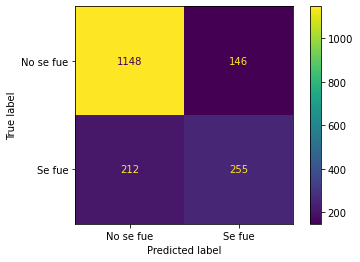

In [22]:
# Ver cómo funciona el modelo entrenado con los datos de prueba
plot_confusion_matrix(modelo, X_test, y_test, values_format='d', display_labels=["No se fue","Se fue"])

En la matriz de confusión vemos que:
+ De $1294$ personas que no se fueron, $1148$ ($88$%) fueron clasificados correctamente. 
+ De los $467$ personas que sí se fueron, $255$ ($54$%) fueron clasificados correctamente. 

Entonces el modelo de XGBoost no fue tan bueno. Parte del problema es que los datos están imbalanceados. 

Ya que el hecho de que se vaya la gente y deje los servicios de IBM cuesta dinero, queremos capturar más la información de las personas que se fueron. La buena noticia es que `XGBoost` tiene un parámetro, 
`scale_pos_weight`, que ayuda con datos imbalanceados. 

Utilicemos **cross-validation** para optimizar los parámetros. 

#### Cross validation y GridSearch para optimizar los hiper-parámetros
`XGBoost` tiene muchísimos hiper-parámetros a ajustar ya sean:
- `max_depth`
- `learning_rate (eta)`
- `gamma`
- `reg_lambda`

In [23]:
# Omptimizar parámetros por secciones para hacerlo más rápido

#Ronda 1
#param_grid={
#    'max_depth':[3,4,5],
#    'learning_rate':[0.1,0.01,0.05],
#    'gamma':[0, 0.25,1],
#    'reg_lambda':[0,1,10],
#    'scale_pos_weight':[1,3,5]
#}

#Ronda 2
param_grid={
    'max_depth':[4],
    'learning_rate':[0.1,0.5,1],
    'gamma':[0.25],
    'reg_lambda':[10,20,100],
    'scale_pos_weight':[3]
}

optimal_params = GridSearchCV(
                            estimator=xgb.XGBClassifier(objective='binary:logistic',
                            seed=42,
                            subsample=0.9,
                            colsample_bytree=0.5),
                            param_grid=param_grid,
                            scoring='roc_auc',
                            verbose=0,
                            n_jobs=10,
                            cv=3)

optimal_params.fit(X_train, y_train,
                  early_stopping_rounds=10,
                  eval_metric='auc',
                  eval_set=[(X_test, y_test)],
                  verbose=False)
optimal_params.best_params_

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 10,
 'scale_pos_weight': 3}

In [24]:
# Construir y evaluar el XGBoost con los hiperparámetros óptimos
modelo = xgb.XGBClassifier(objective='binary:logistic',
                            seed=42,
                           gamma=0.25,
                           learn_rate=0.1,
                           max_depth=4,
                           reg_lambda=10,
                           scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree=0.5)

modelo.fit(X_train, y_train,
                  early_stopping_rounds=10,
                  eval_metric='auc',
                  eval_set=[(X_test, y_test)],
                  verbose=False)

[13:59:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.25, gpu_id=-1,
              importance_type=None, interaction_constraints='', learn_rate=0.1,
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=10, scale_pos_weight=3,
              seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

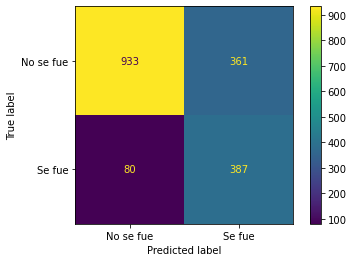

In [25]:
# Ver cómo funciona el modelo entrenado con los datos de prueba
plot_confusion_matrix(modelo, X_test, y_test, values_format='d', display_labels=["No se fue","Se fue"])


### <font color='maroon'> Matriz de confusión: </font>
+ `TP`: True Positive
+ `TN`: True Negative
+ `FP`: False Positive
+ `FN`: False Negative
___
+ <font color='blue'> **Accuracy:** </font>

$\frac{TP+TN}{TP+TN+FP+FN}$

Mide de cuántas observaciones nuestro modelo predijo correctamente sobre el número total de observaciones. 

+ <font color='blue'> **Precision:** </font>

$\frac{TP}{TP+FP}$
Mide cuántas observaciones nuestro modelo predijo correctamente sobre el número de predicciones correctas e incorrectas. 

+ <font color='blue'> **Recall o Sensivity:** </font>

$\frac{TP}{TP+FN}$
Mide cuántas observaciones nuestro modelo predijo correctamente sobre el número total de observaciones. 

+ <font color='blue'> **F1 Score:** </font>

$\frac{2\cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$
Es un balance entre la precisión y recall

**¿Cuál elegir?**
+ Si se tienen datos balanceados, el `Accuracy` podría ser la métrica más apropiada para usar.
+ Si se estuviera tratando de detectar si una manzana está envenenada, el objetivo es reducir el número de $FN$, porque se espera no cometer errorer al clasificar manzanas que están envenenadas. En este caso el `Recall` sería la mejor métrica de evaluación. 
+ Si se trata de predecir si es buena idea invertir en una acción de la bolsa, se esperaría que el modelo sea bueno. En este caso el `Precision` sería la mejor métrica de evaluación ya que mide qué tan "correcto" es el modelo. 
+ Si se busca maximizar tanto el `Precision` como el `Recall`, entonces el `F1 Score` es la mejor métrica de evaluación. 

En la matriz de confusión vemos que de $1294$ personas que no se fueron, $933$ ($72$%) fueron clasificados correctamente. 

Y de los $467$ personas que sí se fueron, $387$ ($82$%) fueron clasificados correctamente.

#### Un poco de bibliografía...
[www.kaggle.com](https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning)